## **Esercizio n°2**
### Analisi di un dataset di film con relative recensioni 

In [31]:
# Importiamo le librerie che utilizzeremo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Per lavorare sui dati nei file movies, ratings e users, raccogliamli in delle 'tabelle' dette dataframe.
# Per fare ciò utilizzeremo la funzione pd.read_csv a cui vanno passati dei parametri:
                    # path, cioè il percorso da seguire per arrivare al file;
movies = pd.read_csv('C:\\Users\\user\\Downloads\\film\\movies.csv',
                   # header, che indica la riga da cui partire;
                   header = 0,
                   # names, con cui indicheremo i nomi delle colonne
                   names = ['movieID', 'title', 'year', 'description'],
                   # separatore, che indica il carattere che divide tra loro i vari dati;
                   sep = '_')

# Questo è simile al precedente solo che invece di dare dei nomi alle colonne prendiamo i nomi scritti 
# nella prima riga del file csv.
ratings = pd.read_csv('C:\\Users\\user\\Downloads\\film\\ratings.csv',
                   header = 0,
                   sep = '_')


users = pd.read_csv('C:\\Users\\user\\Downloads\\film\\users.csv',
                   header = 0,
                   names = ['usersID', 'gender', 'age', 'occupation', 'zipcode'],
                   sep = '_')


In [32]:
# Per vedere i nostri dataframe possiamo fare in vari modi:

# Possiamo stampare solo le prime 5 righe con .head()
print movies.head()

# Oppure possiamo stampare solo le ultime 5 righe con .tail()
print movies.tail()

# Infine possiamo stampare tutte le righe del dataframe con print 
print movies


   movieID                        title  year                   description
0        1                    Toy Story  1995   Animation|Children's|Comedy
1        2                      Jumanji  1995  Adventure|Children's|Fantasy
2        3             Grumpier Old Men  1995                Comedy|Romance
3        4            Waiting to Exhale  1995                  Comedy|Drama
4        5  Father of the Bride Part II  1995                        Comedy
      movieID                title  year     description
3878     3948     Meet the Parents  2000          Comedy
3879     3949  Requiem for a Dream  2000           Drama
3880     3950            Tigerland  2000           Drama
3881     3951     Two Family House  2000           Drama
3882     3952       Contender, The  2000  Drama|Thriller
      movieID                                          title  year  \
0           1                                      Toy Story  1995   
1           2                                        Jumanji  

**ESERCIZIO n°1**

Qual'è il film più recensito?

Per rispondere a questa domanda conviene creare un dataframe che contenga sia i dati relativi ai film e sia quelli relativi alle recensioni, per poi contare il numero di recensioni, e quindi di righe, per ogni film.

In [33]:
# Creiamo il dataframe unendo movies e ratings sulla colonna 'movieID' che compare in entrambi. 
s = pd.merge(movies, ratings, on = 'movieID')

# Stampiamo il risultato dall'unione dei due dataframe 
print s.head()

# Eliminiamo le colonne 'description' e 'timestamp' 
del s['description'], s['timestamp']

# Stampiamo il risultato finale 
print s.head()

   movieID      title  year                  description  usersID  rating  \
0        1  Toy Story  1995  Animation|Children's|Comedy        1       5   
1        1  Toy Story  1995  Animation|Children's|Comedy        6       4   
2        1  Toy Story  1995  Animation|Children's|Comedy        8       4   
3        1  Toy Story  1995  Animation|Children's|Comedy        9       5   
4        1  Toy Story  1995  Animation|Children's|Comedy       10       5   

   timestamp  
0  978824268  
1  978237008  
2  978233496  
3  978225952  
4  978226474  
   movieID      title  year  usersID  rating
0        1  Toy Story  1995        1       5
1        1  Toy Story  1995        6       4
2        1  Toy Story  1995        8       4
3        1  Toy Story  1995        9       5
4        1  Toy Story  1995       10       5


In [34]:
# Per trovare i film che hanno più recensioni innanzitutto raggruppiamo i film per titolo 
q1 = s.groupby('title')

# Per poi contare quante righe ci sono che hanno nella colonna title tale titolo
q1 = q1.size()

# Infine ordiniamo i valori dal più grande al più piccolo
q1 = q1.sort_values(ascending = False)

# Infine stampiamo le prima 10 righe di quello che abbiamo ottenuto
print q1.head(10)

title
American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
dtype: int64


**ESERCIZIO n°2**

Qual'è il film, con più di 50 recensioni, che ha il voto più alto?

Anche in questo caso lavoreremo sul dataframe contenente informazioni sia sui film che sulle recensioni. Ma in questo caso invece che contare il numero i recensioni faremo la media. Infine stamperemo i 5 film più graditi che rispettano la condizione di avere un numero di recensioni maggiore di 50.

In [35]:
# Prendiamo il dataframe s precedentemente creato e raggruppiamo le righe secondo il titlo
q2 = s.groupby('title')

# Dopodichè calcoliamo il numero di commenti e la media delle valutazioni 
q2 = q2.agg({'rating':[np.size, np.mean]})

# Ordiniamo i dati in ordine descrescente 
q2 = q2.sort_values([('rating', 'mean')], ascending = False)

# Mostriamo il risultato
print q2[(q2['rating', 'size'] >= 50)].head()

                                                   rating          
                                                     size      mean
title                                                              
Sanjuro                                                69  4.608696
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The                            2227  4.554558
Godfather, The                                       2223  4.524966
Close Shave, A                                        657  4.520548


**ESERCIZIO n°3**

Qual'è il film su cui donne e uomini sono più in disaccordo?

Per questo esercizio dovremmo unire tuti e tre i dataframe: movies, ratings e users, in modo da avere anche le informazioni sugli utenti. Quindi dovremmo spostare la colonna 'gender' e metterla come riga per dividere le recensioni dei maschi da quelle delle femmine.

In [36]:
# Uniamo insieme i dataframe e stampiamo il risultato
c = pd.merge(s, users, on = 'usersID')

# Eliminiamo le colonne che non ci servono 
del c['zipcode'], c['occupation'], c['age']

# Mostriamo il risultato finale 
c.head()

movieID                               title  year  usersID  rating gender
0        1                           Toy Story  1995        1       5      F
1       48                          Pocahontas  1995        1       5      F
2      150                           Apollo 13  1995        1       5      F
3      260  Star Wars: Episode IV - A New Hope  1977        1       4      F
4      527                    Schindler's List  1993        1       5      F

In [77]:
# Raggruppiamo il dataframe per titolo del film e genere dell'utente e calcoliamo la media delle altre colonne  
votomedio = c.groupby(['title', 'gender']).mean()

# Trasformiamo la colonna 'gender' in una riga 
votomedio = votomedio.unstack('gender')

# Stampiamo il risultato 
print votomedio.head()

# Notiamo che la colonna che ci interessa è 'rating', quindi salviamo quella
votomedio = votomedio.rating

                       movieID            year              usersID  \
gender                       F       M       F       M            F   
title                                                                 
$1,000,000 Duck         2031.0  2031.0  1971.0  1971.0  3154.562500   
'Night Mother           3112.0  3112.0  1986.0  1986.0  3479.138889   
'Til There Was You       779.0   779.0  1997.0  1997.0  2735.432432   
'burbs, The             2072.0  2072.0  1989.0  1989.0  2926.250000   
...And Justice for All  3420.0  3420.0  1979.0  1979.0  2929.400000   

                                       rating            
gender                            M         F         M  
title                                                    
$1,000,000 Duck         2645.142857  3.375000  2.761905  
'Night Mother           2969.735294  3.388889  3.352941  
'Til There Was You      2715.800000  2.675676  2.733333  
'burbs, The             2966.578199  2.793478  2.962085  
...And Justice for All  3

In [78]:
# Creiamo una nuova colonna data dalla differenza di quelle con il voto medio
votomedio['differenza'] = votomedio['F']-votomedio['M']

# Stampiamo il risultato della precedente operazione
print votomedio.head()

# Notiamo che ci sono dei valori negativi, quindi facciamo il modulo della colonna
votomedio['disaccordo'] = abs(votomedio['differenza'])

# Stampiamo ora i 10 film per cui il disaccordo è maggiore
votomedio.sort_values('disaccordo', ascending = False).head(10)

gender                         F         M  differenza
title                                                 
$1,000,000 Duck         3.375000  2.761905    0.613095
'Night Mother           3.388889  3.352941    0.035948
'Til There Was You      2.675676  2.733333   -0.057658
'burbs, The             2.793478  2.962085   -0.168607
...And Justice for All  3.828571  3.689024    0.139547


gender                                                     F         M  \
title                                                                    
Tigrero: A Film That Was Never Made                 1.000000  4.333333   
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  4.000000  1.000000   
Country Life                                        5.000000  2.000000   
Neon Bible, The                                     1.000000  4.000000   
James Dean Story, The                               4.000000  1.000000   
Enfer, L'                                           1.000000  3.750000   
Babyfever                                           3.666667  1.000000   
Stalingrad                                          1.000000  3.593750   
Woman of Paris, A                                   5.000000  2.428571   
Cobra                                               4.000000  1.500000   

gender                                              differenza  disaccordo  
title                                                                       
Tigrero: A Film That Was Never Made                  -3.333333    3.333333  
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...    3.000000    3.000000  
Country Life                                          3.000000    3.000000  
Neon Bible, The                                      -3.000000    3.000000  
James Dean Story, The                                 3.000000    3.000000  
Enfer, L'                                            -2.750000    2.750000  
Babyfever                                             2.666667    2.666667  
Stalingrad                                           -2.593750    2.593750  
Woman of Paris, A                                     2.571429    2.571429  
Cobra                                                 2.500000    2.500000

Possiamo ora fare dei grafici che mostrano il disaccordo tra i commenti dei due sessi. In particolare possiamo farne uno che metta in evidenza solo la quantità della differenza, utilizzando la colonna 'disaccordo', e uno che mostri anche il tipo di disaccordo cioè che mostri chi dei due abbia dato il voto maggiore. Per il primo grafico possiamo scegliere di fare un grafico con una semplice linea, mentre per il secondo un grafico a barre orizzontali.

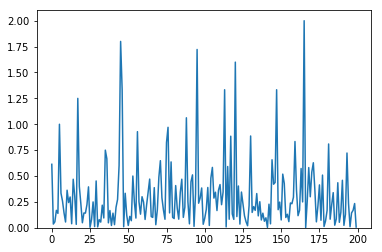

In [100]:
# Primo grafico

# Selezioniamo i valori della colonna accettabili, cioè quelli non nulli 
y = votomedio.disaccordo[votomedio.disaccordo.notnull()]

# Selezioniamone solo una parte 
y = y.head(200)

# Utilizziamo la funzione per fare il grafico 
plt.plot(np.arange(len(y)), y)

# Indichiamo la parte di grafico da mostrare e stampiamolo
plt.ylim(0, )
plt.show()


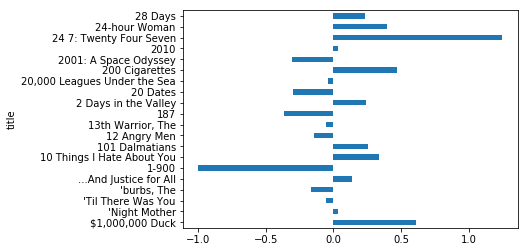

In [95]:
# Secondo grafico 

# Selezioniamo i dati non nulli 
x = votomedio.differenza[votomedio.differenza.notnull()]

# Selezioniamo una parte dei dati 
x = x.head(20)

# Facciamo il bar plot orizzontale
x.plot(kind = 'barh')

plt.show()